In [1]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("../data/TimeSeries.csv")

In [3]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11
0,-2.00,1.51,10.14,0.0,0.0,0.0,-15.78,-22.31,-11.70,-13.57,92.95
1,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
2,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
3,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95
4,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95


In [4]:
df.columns


Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11'], dtype='object')

In [5]:

clf=IsolationForest(contamination=.01) #Soporte a outliers
clf.fit(df) #Deteccion de outliers multivariada

IsolationForest(contamination=0.01)

In [6]:
pred = clf.predict(df) #Hacemos una prediccion, lo que hace es identificar
#los puntos aislados en los arboles

In [7]:
df['anomaly']=pred

In [8]:
df['anomaly'].value_counts() #regresa dos valores

 1    504535
-1      5097
Name: anomaly, dtype: int64

In [9]:
df['anomaly'].value_counts(1) #solo detecta lo pedido en contamination

 1    0.989999
-1    0.010001
Name: anomaly, dtype: float64

In [10]:
to_model_columns = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11']


In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [13]:
pca = PCA(n_components=3) 
scaler = StandardScaler()
X = scaler.fit_transform(df[to_model_columns])
X_reduce = pd.DataFrame(pca.fit_transform(X),columns = ["p0","p1","p2"],index =df.index)

In [14]:
X_reduce_inliers = X_reduce[df["anomaly"]==1]

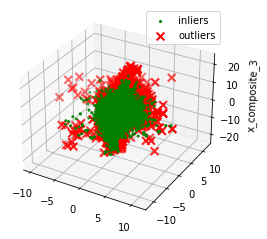

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")


ax.scatter(X_reduce_inliers["p0"], X_reduce_inliers["p1"], zs=X_reduce_inliers["p2"], s=4, lw=1, label="inliers",c="green")


ax.scatter(X_reduce.loc[df["anomaly"]==-1,"p0"],X_reduce.loc[df["anomaly"]==-1,"p1"], X_reduce.loc[df["anomaly"]==-1,"p2"],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [17]:
df["anomaly"] = df["anomaly"]==-1

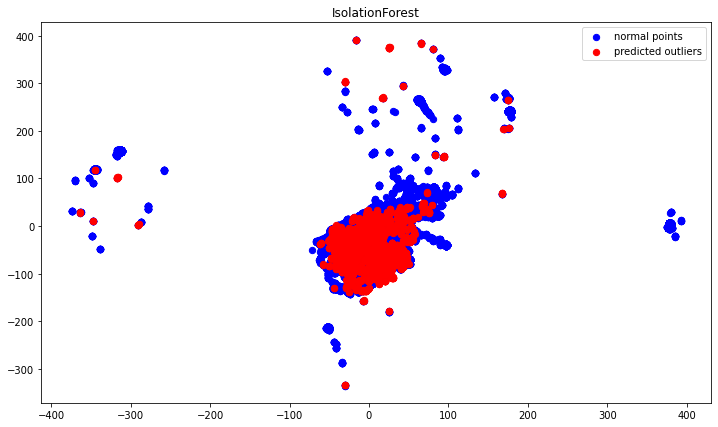

In [18]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df[to_model_columns])


res=pd.DataFrame(pca.transform(df[to_model_columns]))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")


b1 = plt.scatter(res[~df["anomaly"] ][0], res[~df["anomaly"]][1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.loc[df["anomaly"] ,0], res.loc[df["anomaly"] ,1], c='red',
                 s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()


In [19]:
res.loc[df["anomaly"] ,0]

969       51.918655
970       51.758253
971       51.621986
972       51.452168
973       51.199813
            ...    
509053   -13.286069
509378   -13.030255
509379   -13.043584
509499   -18.112251
509500   -18.101769
Name: 0, Length: 5097, dtype: float64

In [21]:
res #pca

,0,1
0,51.436023,-30.240808
1,51.321603,-32.040415
2,51.321603,-32.040415
3,51.322062,-32.037977
4,51.322062,-32.037977
...,...,...
509627,-15.807282,-62.399882
509628,-15.809301,-62.408581
509629,-15.810354,-62.411738
509630,-15.812103,-62.417946


In [20]:
df

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,anomaly
0,-2.00,1.51,10.14,0.0,0.0,0.0,-15.78,-22.31,-11.70,-13.57,92.95,False
1,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95,False
2,-2.00,1.51,10.13,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95,False
3,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95,False
4,-1.99,1.51,10.17,0.0,0.0,0.0,-16.86,-23.38,-10.31,-13.57,92.95,False
...,...,...,...,...,...,...,...,...,...,...,...,...
509627,-8.27,-11.98,-9.35,0.0,0.0,0.0,30.00,8.24,13.90,-7.06,-32.33,False
509628,-8.27,-12.00,-9.41,0.0,0.0,0.0,30.00,8.24,13.90,-7.07,-32.34,False
509629,-8.25,-11.98,-9.40,0.0,0.0,0.0,30.00,8.24,13.90,-7.08,-32.35,False
509630,-8.27,-12.00,-9.41,0.0,0.0,0.0,30.00,8.24,13.90,-7.09,-32.36,False
